<h1 style = "text-align:center"> 毕业设计代码部分</h1>
<h2 style = "text-align:center"> 基于文本处理和机器学习的社交电商用户体验分析</h2>

<br>
<div style="font-weight:bold"> 指导教师：杜晨蔚</div>
<br>
<div style="font-weight:bold"> 学生姓名：王润一</div>
<br>
<div style="font-weight:bold"> 校园卡号：320190940491</div>
<br>
<div style="font-weight:bold"> 学生邮箱：wangrunyi19@lzu.edu.cn</div>

## 1. Data Loading 数据加载

In [1]:
# 导入数据分析的库
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 导入原始数据集 和 经过人工标注的分类数据集 和 停用词列表
data_file = "/Users/steven/Documents/test2402.csv"
class_file = "/Users/steven/Documents/class2402.csv"
stop_words_file = "/Users/steven/Documents/cn_stopwords.txt"

## 2. Data Cleaning 数据清洗

In [2]:
# 将原始数据集 和 分类数据集 进行数据合并 并选取特定的列进行展示
data_dataset = pd.read_csv(data_file)
class_dataset = pd.read_csv(class_file)

original_data = {
                 "时间": list(data_dataset["发表时间"]),
                 "标题": list(data_dataset["标题"]),
                 "内容": list(data_dataset["内容"]),
                 "评级": list(data_dataset["评级"]),    
                 "分类": list(class_dataset["分类"])}
original_dataset = pd.DataFrame(original_data)
original_dataset 

,时间,标题,内容,评级,分类
0,2023-01-28 02:40:08,总是闪退,没用一会就闪退 官方能解决下吗,1,2
1,2023-01-27 16:50:23,个性化推荐烂透了,点过无数次不感兴趣，但还是会看到同样的低俗下流的相关产品。,1,7
2,2023-01-27 08:22:54,官方首页推的助农活动骗人,当时在一个助农活动买了水果 一直没到最后都自动到时间自动收货了 快递还在路上 根本不动 找谁...,1,5
3,2023-01-26 22:36:38,软件越来越烂！,更新后，连手写字都没办法打了！老是乱七八糟的字跳出来！闲鱼自己不知道？？,1,1
4,2023-01-26 22:26:24,闪退烦死了,苹果7疯狂闪退 非常影响使用体验！！！！,1,2
...,...,...,...,...,...
2397,2022-07-29 10:17:16,垃圾软件,商家不给退货，客服不解决问题，平台不维护买家权益，而是纵容卖家欺诈行为,1,6
2398,2022-07-29 09:20:44,黑心,lj平台付钱容易退钱难,1,6
2399,2022-07-29 08:53:24,最讨厌这种强制更新的垃圾,我从淘宝卖旧物，转到闲鱼需要我重新登录，我输完验证码眼看就要登上了，来了个需要更新，返回再登...,1,2
2400,2022-07-29 03:27:39,ipad什么时候才能有横屏啊？,自家淘宝都有这玩意没有？,1,1


In [3]:
# 查看有无缺失值
null_value_check = pd.DataFrame(original_dataset.isnull().sum(), columns=["缺失值个数统计"])
null_value_check

,缺失值个数统计
时间,0
标题,0
内容,0
评级,0
分类,0


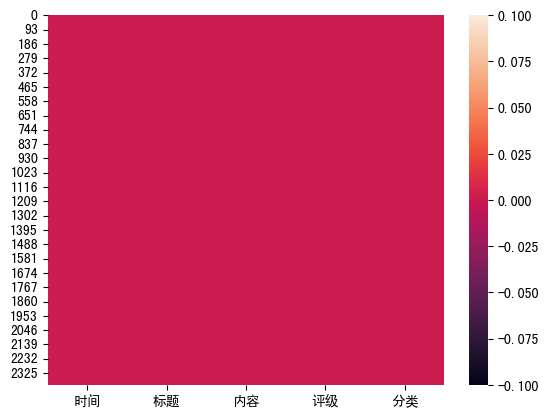

In [4]:
# 使用热力图查看缺失值 如果有缺失值，则会在图中对应的索引（index）处看到一条横杠
# Using heatmap function in "seaborn" library to identify NaN values! 
sns.heatmap(original_dataset.isna())
plt.show()

In [5]:
# 去除重复的评论内容
df1 = original_dataset.drop_duplicates(keep="first", subset=["内容"])
df1

,时间,标题,内容,评级,分类
0,2023-01-28 02:40:08,总是闪退,没用一会就闪退 官方能解决下吗,1,2
1,2023-01-27 16:50:23,个性化推荐烂透了,点过无数次不感兴趣，但还是会看到同样的低俗下流的相关产品。,1,7
2,2023-01-27 08:22:54,官方首页推的助农活动骗人,当时在一个助农活动买了水果 一直没到最后都自动到时间自动收货了 快递还在路上 根本不动 找谁...,1,5
3,2023-01-26 22:36:38,软件越来越烂！,更新后，连手写字都没办法打了！老是乱七八糟的字跳出来！闲鱼自己不知道？？,1,1
4,2023-01-26 22:26:24,闪退烦死了,苹果7疯狂闪退 非常影响使用体验！！！！,1,2
...,...,...,...,...,...
2397,2022-07-29 10:17:16,垃圾软件,商家不给退货，客服不解决问题，平台不维护买家权益，而是纵容卖家欺诈行为,1,6
2398,2022-07-29 09:20:44,黑心,lj平台付钱容易退钱难,1,6
2399,2022-07-29 08:53:24,最讨厌这种强制更新的垃圾,我从淘宝卖旧物，转到闲鱼需要我重新登录，我输完验证码眼看就要登上了，来了个需要更新，返回再登...,1,2
2400,2022-07-29 03:27:39,ipad什么时候才能有横屏啊？,自家淘宝都有这玩意没有？,1,1


In [6]:
# 过滤掉短评论 往往没有太多价值
for index, row in df1.iterrows():
    comment = row["内容"]
    comment_length = len(comment)
    if comment_length <= 5:
        df1 = df1.drop(index)
df1 = df1.reset_index(drop=True)
df1

,时间,标题,内容,评级,分类
0,2023-01-28 02:40:08,总是闪退,没用一会就闪退 官方能解决下吗,1,2
1,2023-01-27 16:50:23,个性化推荐烂透了,点过无数次不感兴趣，但还是会看到同样的低俗下流的相关产品。,1,7
2,2023-01-27 08:22:54,官方首页推的助农活动骗人,当时在一个助农活动买了水果 一直没到最后都自动到时间自动收货了 快递还在路上 根本不动 找谁...,1,5
3,2023-01-26 22:36:38,软件越来越烂！,更新后，连手写字都没办法打了！老是乱七八糟的字跳出来！闲鱼自己不知道？？,1,1
4,2023-01-26 22:26:24,闪退烦死了,苹果7疯狂闪退 非常影响使用体验！！！！,1,2
...,...,...,...,...,...
2180,2022-07-29 10:17:16,垃圾软件,商家不给退货，客服不解决问题，平台不维护买家权益，而是纵容卖家欺诈行为,1,6
2181,2022-07-29 09:20:44,黑心,lj平台付钱容易退钱难,1,6
2182,2022-07-29 08:53:24,最讨厌这种强制更新的垃圾,我从淘宝卖旧物，转到闲鱼需要我重新登录，我输完验证码眼看就要登上了，来了个需要更新，返回再登...,1,2
2183,2022-07-29 03:27:39,ipad什么时候才能有横屏啊？,自家淘宝都有这玩意没有？,1,1


In [7]:
# 将数据集的 标题 与 内容 进行合并 新的列表取名为“评论”
df1["评论"] = df1["标题"] + df1["内容"]
df2 = df1[["时间", "评论", "评级", "分类"]]
df2

,时间,评论,评级,分类
0,2023-01-28 02:40:08,总是闪退没用一会就闪退 官方能解决下吗,1,2
1,2023-01-27 16:50:23,个性化推荐烂透了点过无数次不感兴趣，但还是会看到同样的低俗下流的相关产品。,1,7
2,2023-01-27 08:22:54,官方首页推的助农活动骗人当时在一个助农活动买了水果 一直没到最后都自动到时间自动收货了 快递...,1,5
3,2023-01-26 22:36:38,软件越来越烂！更新后，连手写字都没办法打了！老是乱七八糟的字跳出来！闲鱼自己不知道？？,1,1
4,2023-01-26 22:26:24,闪退烦死了苹果7疯狂闪退 非常影响使用体验！！！！,1,2
...,...,...,...,...
2180,2022-07-29 10:17:16,垃圾软件商家不给退货，客服不解决问题，平台不维护买家权益，而是纵容卖家欺诈行为,1,6
2181,2022-07-29 09:20:44,黑心lj平台付钱容易退钱难,1,6
2182,2022-07-29 08:53:24,最讨厌这种强制更新的垃圾我从淘宝卖旧物，转到闲鱼需要我重新登录，我输完验证码眼看就要登上了，...,1,2
2183,2022-07-29 03:27:39,ipad什么时候才能有横屏啊？自家淘宝都有这玩意没有？,1,1


In [8]:
# 查看清洗后 数据集规模和大小
df2.shape

(2185, 4)

In [9]:
# 查看清洗后 数据集每一列的名称
df2.columns

Index(['时间', '评论', '评级', '分类'], dtype='object')

In [10]:
# 查看清洗后 数据集总结 A summary of data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2185 entries, 0 to 2184
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   时间      2185 non-null   object
 1   评论      2185 non-null   object
 2   评级      2185 non-null   int64 
 3   分类      2185 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 68.4+ KB


## 3. Text Tokenization    文本分词

### 3.1 中文分词 + 词汇过滤 + 去除停用词 

In [11]:
# 使用jieba分词，对处理过后的语句进行拆分
# 文本信息中含有大量的语气词，表情符号，特殊字符等等，这些与本文并没有太多关系，需要在分词后进行删除

import jieba
import jieba.posseg as pseg
# import paddle

# paddle.enable_static()
# jieba.enable_paddle()  

In [12]:
# 接下来是去除停用词的步骤，我们的实例是社交电商平台“咸鱼”因此中文也在停用词语列表当中
stopwords = [line.strip() for line in open(stop_words_file, encoding='utf-8', mode ='r').readlines()]
stopwords

['$',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 '？？',
 '差劲',
 '玩意',
 '感觉',
 '收货',
 '产品',
 '账号',
 '客服',
 '坐地',
 '信息',
 '电话',
 '字体',
 '空白',
 '组件',
 '贵重物品',
 '个人风险',
 '解决问题',
 '物品',
 '个人',
 '风险',
 '解决',
 '问题',
 '联系',
 '问问',
 '照片',
 '现实',
 '贵重',
 '系统',
 '信用',
 '条款',
 '情况',
 '偏向',
 '不能',
 '横屏',
 '钻空子',
 '售假',
 '假货',
 '权限',
 '团伙',
 '骗钱',
 '会员名',
 '坑人',
 '交易',
 '淘宝',
 '价格',
 '图片',
 '素质',
 '消费者',
 '物品',
 '下单',
 '商家',
 '体验',
 '卖东西',
 '不会',
 '上求',
 '块钱',
 '给出',
 '买手机',
 '人理',
 '卖家',
 '买家',
 '闲置',
 '商品',
 '问题',
 '恶心',
 '评价',
 '上架不行',
 '不行',
 '只能',
 '官方',
 '办法',
 '骗子',
 '功能',
 '无法',
 '电商',
 '用户',
 '平台',
 '人员',
 '质量',
 '咸鱼',
 '闲鱼',
 '分类',
 '垃圾',
 '无语',
 '软件',
 '可惜',
 '去死',
 '随意',
 '好用',
 '无法',
 '文字狱',
 '不好用',
 'd版',
 'q版',
 't恤',
 '一值',
 '一分钱',
 '一单',
 '一大',
 '一星',
 '一个',
 '一棍子',
 '黑点',
 '黑心',
 '黑粉',
 '黑芝麻',
 '黑钱',
 '鼻子',
 '鼓励',
 '三观',
 '上买',
 '上交',
 '鸦居',
 '麻麻',
 '黄豆',
 '黄鱼',
 '万能',
 '一键',
 '一节课',
 '一格',
 '上传不了',
 '上传',
 '上写',
 '上帝',
 '鱼水',
 '鱼群',
 '鳄鱼皮',
 '鸡儿',
 '鸡毛',
 '鱼

In [13]:
total_word_list = []
df3 = df2[["时间", "评论"]]

for index, row in df3.iterrows():
    word_list = []
    comment = row["评论"]
    comment_seg = pseg.lcut(comment)
    for word, flag in comment_seg:
        if len(word) >=2:                            # 分词过后的关键词至少为2个词
            if flag in ["n", "v", "a" ,"ad", "nz"]:  # n: 名字 v:动词 a:形容词 ad: 副词
                if word in stopwords:
                    pass
                else:
                    word_list.append(word)
    if len(word_list) <= 2:                          # 针对关键词过滤后词数量太少情况
        df3 = df3.drop(index)
        df2 = df2.drop(index)
    else:
        total_word_list.append(word_list)

df3 = df3.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3["分词结果"] = total_word_list

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/82/ky1dsxzj6txcdhtxy4fhm48r0000gn/T/jieba.cache
Loading model cost 0.831 seconds.
Prefix dict has been built successfully.


In [14]:
df2

,时间,评论,评级,分类
0,2023-01-28 02:40:08,总是闪退没用一会就闪退 官方能解决下吗,1,2
1,2023-01-27 16:50:23,个性化推荐烂透了点过无数次不感兴趣，但还是会看到同样的低俗下流的相关产品。,1,7
2,2023-01-27 08:22:54,官方首页推的助农活动骗人当时在一个助农活动买了水果 一直没到最后都自动到时间自动收货了 快递...,1,5
3,2023-01-26 22:26:24,闪退烦死了苹果7疯狂闪退 非常影响使用体验！！！！,1,2
4,2023-01-26 18:53:44,平台不处理被骗消费者垃圾，上面有很多骗钱的，平台都不能投诉举报，注意着点吧。。。,1,4
...,...,...,...,...
1752,2022-07-29 14:17:41,0什么软件无语死了，动不动就删除帖子，客服还跟不会说话一样，半天回一个消息,1,6
1753,2022-07-29 10:17:16,垃圾软件商家不给退货，客服不解决问题，平台不维护买家权益，而是纵容卖家欺诈行为,1,6
1754,2022-07-29 09:20:44,黑心lj平台付钱容易退钱难,1,6
1755,2022-07-29 08:53:24,最讨厌这种强制更新的垃圾我从淘宝卖旧物，转到闲鱼需要我重新登录，我输完验证码眼看就要登上了，...,1,2


In [15]:
df3

,时间,评论,分词结果
0,2023-01-28 02:40:08,总是闪退没用一会就闪退 官方能解决下吗,"[闪退, 没用, 闪退]"
1,2023-01-27 16:50:23,个性化推荐烂透了点过无数次不感兴趣，但还是会看到同样的低俗下流的相关产品。,"[个性化, 推荐, 烂透, 了点过, 看到, 低俗, 下流, 相关]"
2,2023-01-27 08:22:54,官方首页推的助农活动骗人当时在一个助农活动买了水果 一直没到最后都自动到时间自动收货了 快递...,"[助农, 骗人, 水果, 时间, 快递, 根本, 根本, 途径]"
3,2023-01-26 22:26:24,闪退烦死了苹果7疯狂闪退 非常影响使用体验！！！！,"[闪退, 烦死, 苹果, 疯狂, 闪退, 使用]"
4,2023-01-26 18:53:44,平台不处理被骗消费者垃圾，上面有很多骗钱的，平台都不能投诉举报，注意着点吧。。。,"[处理, 投诉, 举报, 注意]"
...,...,...,...
1752,2022-07-29 14:17:41,0什么软件无语死了，动不动就删除帖子，客服还跟不会说话一样，半天回一个消息,"[删除, 帖子, 说话, 消息]"
1753,2022-07-29 10:17:16,垃圾软件商家不给退货，客服不解决问题，平台不维护买家权益，而是纵容卖家欺诈行为,"[退货, 维护, 权益, 纵容, 行为]"
1754,2022-07-29 09:20:44,黑心lj平台付钱容易退钱难,"[付钱, 容易, 退钱]"
1755,2022-07-29 08:53:24,最讨厌这种强制更新的垃圾我从淘宝卖旧物，转到闲鱼需要我重新登录，我输完验证码眼看就要登上了，...,"[讨厌, 强制, 旧物, 转到, 需要, 重新, 登录, 输完, 验证码, 眼看, 登上, ..."


In [16]:
df4 = df3
df4

,时间,评论,分词结果
0,2023-01-28 02:40:08,总是闪退没用一会就闪退 官方能解决下吗,"[闪退, 没用, 闪退]"
1,2023-01-27 16:50:23,个性化推荐烂透了点过无数次不感兴趣，但还是会看到同样的低俗下流的相关产品。,"[个性化, 推荐, 烂透, 了点过, 看到, 低俗, 下流, 相关]"
2,2023-01-27 08:22:54,官方首页推的助农活动骗人当时在一个助农活动买了水果 一直没到最后都自动到时间自动收货了 快递...,"[助农, 骗人, 水果, 时间, 快递, 根本, 根本, 途径]"
3,2023-01-26 22:26:24,闪退烦死了苹果7疯狂闪退 非常影响使用体验！！！！,"[闪退, 烦死, 苹果, 疯狂, 闪退, 使用]"
4,2023-01-26 18:53:44,平台不处理被骗消费者垃圾，上面有很多骗钱的，平台都不能投诉举报，注意着点吧。。。,"[处理, 投诉, 举报, 注意]"
...,...,...,...
1752,2022-07-29 14:17:41,0什么软件无语死了，动不动就删除帖子，客服还跟不会说话一样，半天回一个消息,"[删除, 帖子, 说话, 消息]"
1753,2022-07-29 10:17:16,垃圾软件商家不给退货，客服不解决问题，平台不维护买家权益，而是纵容卖家欺诈行为,"[退货, 维护, 权益, 纵容, 行为]"
1754,2022-07-29 09:20:44,黑心lj平台付钱容易退钱难,"[付钱, 容易, 退钱]"
1755,2022-07-29 08:53:24,最讨厌这种强制更新的垃圾我从淘宝卖旧物，转到闲鱼需要我重新登录，我输完验证码眼看就要登上了，...,"[讨厌, 强制, 旧物, 转到, 需要, 重新, 登录, 输完, 验证码, 眼看, 登上, ..."


In [17]:
total_word_list

[['闪退', '没用', '闪退'],
 ['个性化', '推荐', '烂透', '了点过', '看到', '低俗', '下流', '相关'],
 ['助农', '骗人', '水果', '时间', '快递', '根本', '根本', '途径'],
 ['闪退', '烦死', '苹果', '疯狂', '闪退', '使用'],
 ['处理', '投诉', '举报', '注意'],
 ['游戏', '开挂', '游戏', '开挂', '封号', '赔偿', '就让', '开挂', '继续', '坑害', '骗人'],
 ['保障', '购买', '保障', '购买', '收到', '对版', '申请', '退货', '退款', '承担', '保障'],
 ['燃料',
  '差点',
  '拿到',
  '心情',
  '认真',
  '单机',
  '玩玩',
  '缩圈',
  '太慢',
  '了缩',
  '太慢',
  '了缩',
  '太慢',
  '挺好',
  '整体',
  '不错',
  '期待',
  '内容',
  '画面',
  '要求',
  '重点',
  '玩法',
  '挺好玩',
  '属于',
  '节奏',
  '需要',
  '值得',
  '拥有',
  '喜欢',
  '不同',
  '技能',
  '搭配',
  '占优',
  '取胜',
  '喜欢',
  '丫头',
  '喜爱',
  '酒肆',
  '喜欢',
  '种田',
  '不想',
  '打城',
  '心态',
  '好玩',
  '地形',
  '认识',
  '朋友',
  '挺好玩',
  '不错',
  '很高',
  '观赏性',
  '可玩性',
  '萌新',
  '看看',
  '知道',
  '咋玩',
  '很棒',
  '有点',
  '值得',
  '加油',
  '单论',
  '玩法',
  '觉得',
  '好玩',
  '可玩性',
  '符合',
  '样子',
  '觉得',
  '还原',
  '剧情',
  '人物',
  '不错',
  '不错',
  '值得',
  '不错',
  '五星',
  '运气',
  '挺好玩',
  '资源',
  '搞起',
  '下决心',
  '改改',
  '挺好',


## 4. Text Vectorization 文本向量化

In [18]:
# 将去除停用词后的文本分词进行格式转化，方便加下来的文本向量化操作
stop_words_list = []
for token_list in total_word_list:
    text_string = ""
    final_element = token_list[-1]
    for token in token_list:
        if token == final_element:
            text_string = text_string + token
        else:
            text_string = text_string + token + " "
    stop_words_list.append(text_string)

stop_words_list

['闪退没用 闪退',
 '个性化 推荐 烂透 了点过 看到 低俗 下流 相关',
 '助农 骗人 水果 时间 快递 根本 根本 途径',
 '闪退 烦死 苹果 疯狂 闪退 使用',
 '处理 投诉 举报 注意',
 '游戏 开挂 游戏 开挂 封号 赔偿 就让 开挂 继续 坑害 骗人',
 '保障购买 保障购买 收到 对版 申请 退货 退款 承担 保障',
 '燃料 差点 拿到 心情 认真 单机 玩玩 缩圈 太慢 了缩 太慢 了缩 太慢 挺好 整体 不错 期待 内容 画面 要求 重点 玩法 挺好玩 属于 节奏 需要 值得 拥有 喜欢 不同 技能 搭配 占优 取胜 喜欢 丫头 喜爱 酒肆 喜欢 种田 不想 打城 心态 好玩 地形 认识 朋友 挺好玩 不错 很高 观赏性 可玩性 萌新 看看 知道 咋玩 很棒 有点 值得 加油 单论 玩法 觉得 好玩 可玩性 符合 样子 觉得 还原 剧情 人物 不错 不错 值得 不错 五星 运气 挺好玩 资源 搞起 下决心 改改 挺好 不错 爱斗音',
 '人工 摆件 区别 保障',
 '成功 标签就用 文字 标签',
 '恶意 聊天 引导 申诉',
 '觉得 挺好用 方便 不用 买错 方便 买到 应该 专柜 态度 私人 专门 开店 大爷',
 '法庭 判断 法庭 领取 页面 获得 鱼币 希望 检查一下',
 '使用 清楚 记得 出掉 开心 完全 忘记 初心 规则 导致 曝光 出单 妥协 简单 拍摄 发布 文字 描述 详细 遇到 有缘 发布 参加 增加 流量 曝光 参加 基本上 曝光 根本 不到 链接 搜索 贩子 倒卖 发布 规则 利用 规则 漏洞 实际 相符 低价 引流 欺骗 进店 点击 数码产品 市场 充斥 大量 环境',
 '修改 修改 害得 注销 重新 注册 机会 默认 搞笑',
 '二手物品 进去 主页 了解 详情 私聊 了解 详情 全是 店铺 广告 标的 低价 吸引 进去 推出 宗旨 直接 下架 乱象 局面 品牌',
 '不太好 卖出 改进',
 '人性化 太小 自由 换成 长辈 模式 收藏 减少',
 '王者 私信 套路 标和 皮肤 限定',
 '偏袒 根本 判定 纠纷 申诉 人工 证据 告知 证据不足 再用',
 '地方 上架 假冒 扣分 封号 知道 封号 希望 下载 考虑 清楚 解决不了 需要 小票 了上',
 '误封 

In [19]:
# 使用Tf-idf Vectorizer将文本转化为向量
# 如果一个词可以很好地将不同的文档区分开来，算法就会给它分配更高的权重，
# 如果某个词在所有的文档中出现的频率都很高，则说明这个词区分文档的作用不大，算法会给它分配一个较低的权重
from sklearn.feature_extraction.text import TfidfVectorizer
 
# 实例化TfidfVectorizer
tfidf = TfidfVectorizer()

# 调用fit_transform输入并转换数据
vector_tf = tfidf.fit_transform(stop_words_list)

# 结果传递给变量
column = tfidf.get_feature_names_out()
vector_data = vector_tf.toarray()

# 输出向量化之后的结果
df5 = pd.DataFrame(data=vector_data, columns=column)
df5

,d版,q版,t恤,上当,上报,上新,上架,上架上架,上查,上滑,...,高管,高风险,魔幻,鱼号,鱼币,鸡肋,黄色,黑夜,黑色,默认
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# 加上时间作为参数，可以更好的看到每一条评论向量化之后的结果
# The axis to concatenate along axis: {0/’index’, 1/’columns’}
df6 = pd.concat([df4["时间"], df5], axis=1)
df6

,时间,d版,q版,t恤,上当,上报,上新,上架,上架上架,上查,...,高管,高风险,魔幻,鱼号,鱼币,鸡肋,黄色,黑夜,黑色,默认
0,2023-01-28 02:40:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-01-27 16:50:23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-01-27 08:22:54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-01-26 22:26:24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-01-26 18:53:44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,2022-07-29 14:17:41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1753,2022-07-29 10:17:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1754,2022-07-29 09:20:44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1755,2022-07-29 08:53:24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# 将向量化的结果进行输出,保存为csv格式，同时输出的结果不需要带上index索引，方便后续直接读取

# df6.to_csv("/Users/steven/Downloads/Result.csv", index=False)

## 5. Manual Classification 人工标注

In [22]:
# 人工进行情感标注，为机器学习做准备
# 标注共分为3个大板块，9个小板块，对应序号1-9，对于无效评论，我们赋值0.

# 系统（程序功能，系统体验，账户安全）       1, 2, 3

# 购物（商品质量，物流问题，交易纠纷）       4, 5, 6

# 内容（社区生态，审核监督，宣传推广）       7, 8, 9

In [23]:
# 加上对应的分类标签，可以看到向量化之后完整的数据集 同时，生成单独的index行
df7 = pd.concat([df6, df2["分类"]], axis=1)
df7 = df7.reset_index(drop=True)
df7

,时间,d版,q版,t恤,上当,上报,上新,上架,上架上架,上查,...,高风险,魔幻,鱼号,鱼币,鸡肋,黄色,黑夜,黑色,默认,分类
0,2023-01-28 02:40:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2023-01-27 16:50:23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,2023-01-27 08:22:54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,2023-01-26 22:26:24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2023-01-26 18:53:44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,2022-07-29 14:17:41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1753,2022-07-29 10:17:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1754,2022-07-29 09:20:44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1755,2022-07-29 08:53:24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [24]:
df7["分类"]

0       2
1       7
2       5
3       2
4       4
       ..
1752    6
1753    6
1754    6
1755    2
1756    4
Name: 分类, Length: 1757, dtype: int64

## 6. Machine Learning 机器学习

In [25]:
# 查看最终的df规模大小，提取其列的数目
number_of_columns = df7.shape[1]
number_of_columns

4075

In [26]:
# 将数据部分 与 分类的最终结果 进行分离
last_index = number_of_columns -1

X = df7.iloc[:, 2:last_index].values  # Features    1:last_index： 即从第一个向量化的词语开始，到最后一列人工标注之前为止
y = df7.iloc[:, last_index].values    # Target
i = df7.iloc[:, 0].values             # Index

In [27]:
# 查看分离后的Features规模：
X.shape

(1757, 4072)

In [28]:
# 查看分离后的Target规模：
y.shape

(1757,)

In [29]:
# 查看分离后，作为Target的数据集的类别有哪些

# 系统（程序功能，系统体验，账户安全）       1, 2, 3

# 购物（商品质量，物流问题，交易纠纷）       4, 5, 6

# 内容（社区生态，审核监督，宣传推广）       7, 8, 9    注：无效评论赋值为0

df7["分类"].unique()

array([2, 7, 5, 4, 6, 0, 1, 8, 9, 3])

In [30]:
# 查看分离后，作为Target的数据集，不同类别的数量统计
value_counts = df7["分类"].value_counts()
value_counts_check = pd.DataFrame(value_counts)

index_list = []
count_list = []
for index, row in value_counts_check.iterrows():
    index_list.append(index)
    count_value = row["分类"]
    count_list.append(count_value)


value_counts_check_dic = {
                          "评论类别": index_list,
                          "评论数量": count_list}
value_counts_check_df = pd.DataFrame(value_counts_check_dic)
value_counts_check_df = value_counts_check_df.sort_values("评论类别", ascending=True)
value_counts_check_df.reset_index(drop=True)

,评论类别,评论数量
0,0,31
1,1,275
2,2,192
3,3,50
4,4,286
5,5,30
6,6,312
7,7,173
8,8,327
9,9,81


In [31]:
# Use 90% data as training and 10% test
# 机器学习 训练集 测试集 分离 （80%训练集，20%测试集）
# shuffle = False 防止打乱顺序
# 每次的训练集都不一样，这如果在我们训练模型的时候出现，或者每次重新执行程序的时候，每次训练集都不同，那就不太对了。
# 通常，我们希望重复执行的时候，训练集也是一样的。
# 所以，我们要设置这个random_state，目前，随便给他一个整数,设置好即可，例如：random_state=10

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, i, test_size = 0.2, random_state=10) 

# shuffle=False
# random_state=10

In [32]:
# Determine the dimensionality of data for test, train and index.
print('Train features=',X_train.shape)
print('Test features=',X_test.shape)
print('Train label=',y_train.shape)
print('Test label=',y_test.shape)
print('\n')
print('Train index=',i_train.shape)
print('Test index=',i_test.shape)

Train features= (1405, 4072)
Test features= (352, 4072)
Train label= (1405,)
Test label= (352,)


Train index= (1405,)
Test index= (352,)


### 6.1 朴素贝叶斯模型

In [33]:
# Build a classification model based on Naive Bayes algorithm
# Train a model
from sklearn.naive_bayes import GaussianNB

nv_Model = GaussianNB()            # call the model
nv_Model.fit(X_train, y_train)     # traing the model using "fit" function
print(nv_Model)

GaussianNB()


In [34]:
# 训练集结果
pred_Train_nv_Model = nv_Model.predict(X_train)
pred_Train_nv_Model

array([6, 4, 6, ..., 2, 8, 6])

In [35]:
# 训练集 非 测试集 准确率
# Prediction results on Training set

nv_Model.score(X_train, y_train)  # Accuracy on train set; 
# classifier.score which provides a simple accuracy score of our model.

0.9195729537366548

In [36]:
# 计算 测试集 每一个结果出现的可能性（概率）选取最大的概率作为预测结果
# Estimate the probalility values for test set
yprob_nv_Model = nv_Model.predict_proba(X_test)
# print(yprob_nv_Model)                      # or  yprob[0:5:].round(3)
# # yprob.shape

prob_list = []
for each_result in yprob_nv_Model:
    prob_list.append(each_result)

prob_list_df = pd.DataFrame(data=prob_list, columns=["0", "1", "2", "3", "4", "5", "6", "7", "8" ,"9"])
prob_list_df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
347,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
349,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
350,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# 计算test当中的分类结果
# Compute predicted class
pred_Test_nv_Model = nv_Model.predict(X_test)
print(pred_Test_nv_Model)
print(type(pred_Test_nv_Model))

[7 4 5 6 6 1 1 2 8 7 1 8 6 1 6 6 8 9 1 4 2 2 6 8 0 6 7 8 8 7 7 3 6 2 8 6 4
 6 6 4 4 6 6 4 1 2 8 6 6 4 8 6 3 4 4 8 6 8 8 6 2 6 9 6 8 9 7 4 6 2 6 7 2 1
 1 4 9 8 8 6 3 6 4 4 2 2 4 2 1 6 4 4 6 1 6 1 4 6 4 6 8 6 7 0 3 6 4 2 3 0 1
 2 7 8 2 6 4 6 9 1 6 3 6 0 1 4 1 7 9 1 1 4 7 4 4 6 6 4 7 2 4 6 6 2 8 7 8 7
 1 4 8 6 7 3 4 7 0 8 9 8 2 1 6 7 4 6 2 1 2 8 8 2 1 6 7 6 8 1 3 6 4 3 7 7 8
 9 9 7 8 4 8 9 9 8 1 6 4 7 7 6 6 4 9 6 7 3 2 2 2 8 6 1 2 1 2 6 8 4 3 0 8 6
 1 9 8 8 6 1 9 8 4 9 6 4 8 1 6 1 1 4 3 2 8 9 4 3 8 6 8 7 0 6 8 7 4 4 4 8 1
 4 4 7 0 7 4 1 7 1 1 4 9 4 6 6 6 6 6 1 6 6 2 9 6 7 1 3 4 2 1 6 2 7 7 8 3 8
 8 4 6 1 6 4 6 6 8 3 6 2 1 2 8 4 8 7 2 1 6 6 1 1 8 4 1 1 6 4 7 6 6 4 4 3 7
 7 8 6 8 1 7 1 4 6 1 4 1 4 1 1 9 6 1 2]
<class 'numpy.ndarray'>


In [38]:
# 查看人工标注的分类结果
y_test

array([8, 1, 0, 6, 4, 1, 7, 2, 8, 4, 1, 4, 8, 1, 8, 8, 3, 7, 1, 4, 2, 2,
       6, 3, 1, 8, 8, 8, 8, 4, 9, 1, 1, 2, 8, 7, 6, 9, 6, 4, 6, 4, 8, 6,
       1, 7, 8, 4, 4, 6, 6, 6, 2, 3, 4, 8, 6, 7, 8, 4, 1, 4, 9, 6, 8, 4,
       4, 6, 6, 2, 6, 4, 2, 1, 8, 8, 9, 8, 7, 7, 1, 4, 6, 6, 1, 2, 9, 7,
       1, 4, 8, 7, 7, 1, 5, 1, 7, 4, 6, 6, 3, 8, 8, 7, 4, 8, 4, 2, 6, 2,
       1, 1, 9, 6, 2, 2, 7, 8, 7, 2, 6, 8, 6, 4, 6, 8, 1, 1, 8, 1, 4, 4,
       0, 7, 8, 8, 4, 7, 1, 4, 6, 6, 0, 4, 4, 6, 6, 8, 6, 6, 3, 4, 6, 4,
       5, 3, 7, 8, 8, 9, 2, 9, 4, 8, 8, 5, 1, 1, 2, 4, 6, 2, 1, 6, 9, 3,
       1, 1, 1, 7, 7, 6, 4, 8, 6, 4, 4, 9, 7, 7, 4, 2, 7, 0, 2, 6, 2, 4,
       9, 4, 6, 8, 8, 3, 7, 3, 2, 2, 2, 8, 6, 1, 9, 2, 8, 6, 8, 4, 6, 6,
       1, 6, 1, 7, 6, 7, 6, 2, 9, 8, 6, 1, 4, 4, 7, 1, 7, 2, 2, 6, 1, 2,
       8, 1, 6, 4, 8, 9, 8, 7, 6, 2, 4, 8, 8, 5, 4, 4, 7, 8, 6, 7, 2, 9,
       4, 2, 7, 1, 9, 8, 4, 8, 6, 8, 6, 6, 4, 1, 6, 2, 2, 7, 4, 4, 4, 6,
       4, 1, 1, 7, 4, 4, 6, 4, 8, 9, 0, 7, 8, 1, 8,

In [39]:
# 查看在经过Train-Test_Split处理之前，原始索引结果
i_test

array(['2022-12-28 09:17:43', '2022-07-30 14:37:46',
       '2022-10-03 22:27:04', '2022-11-29 07:48:28',
       '2022-08-25 18:33:37', '2023-01-20 22:45:03',
       '2022-10-10 20:01:54', '2022-09-02 19:41:07',
       '2022-10-12 11:05:16', '2022-10-16 22:39:20',
       '2022-09-20 20:05:19', '2022-09-29 01:16:14',
       '2023-01-04 12:41:32', '2022-12-28 22:39:17',
       '2022-10-22 02:20:23', '2022-09-27 07:22:32',
       '2022-08-03 16:02:57', '2022-12-21 18:58:25',
       '2022-09-17 17:11:17', '2022-08-31 10:12:27',
       '2022-07-31 17:08:23', '2022-09-25 13:04:19',
       '2022-12-24 11:56:16', '2022-07-29 16:35:54',
       '2023-01-12 16:34:20', '2022-12-06 10:32:32',
       '2023-01-09 19:38:05', '2022-12-05 14:35:29',
       '2022-08-14 10:18:59', '2022-12-01 09:39:23',
       '2022-12-09 11:18:24', '2022-09-10 18:31:48',
       '2022-10-17 15:52:57', '2022-10-31 17:55:41',
       '2022-09-07 11:20:23', '2022-08-25 09:06:06',
       '2022-09-01 10:17:16', '2022-08-13 16:4

In [40]:
# 系统（程序功能，系统体验，账户安全）       1, 2, 3

# 购物（商品质量，物流问题，交易纠纷）       4, 5, 6

# 内容（社区生态，审核监督，宣传推广）       7, 8, 9    注：无效评论赋值为0


predicted_rersult1 = {
                      "原Index索引": list(i_test),  
                      "每个结果的可能性": list(yprob_nv_Model),  
                      "机器最终预测值": list(pred_Test_nv_Model),
                      "人工标注实际值": list(y_test)}
predicted_rersult_df1 = pd.DataFrame(predicted_rersult1)
predicted_rersult_df1

,原Index索引,每个结果的可能性,机器最终预测值,人工标注实际值
0,2022-12-28 09:17:43,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",7,8
1,2022-07-30 14:37:46,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",4,1
2,2022-10-03 22:27:04,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",5,0
3,2022-11-29 07:48:28,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",6,6
4,2022-08-25 18:33:37,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",6,4
...,...,...,...,...
347,2022-10-15 20:52:33,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,6
348,2022-08-29 11:35:36,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9,8
349,2022-11-02 10:32:03,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",6,8
350,2022-08-21 05:10:13,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,2


### 6.2 KNN分类模型

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_Model = KNeighborsClassifier(n_neighbors = 10)   # Define a KNN classifier
knn_Model.fit(X_train, y_train)                      # Training the model
print(knn_Model)

KNeighborsClassifier(n_neighbors=10)


In [42]:
# 训练集结果
pred_Train_knn_Model = knn_Model.predict(X_train)

In [43]:
# 训练集 非 测试集 准确率
knn_Model.score(X_train, y_train)  # Accuracy on train set; 
# classifier.score which provides a simple accuracy score of our model.

0.6142348754448399

In [44]:
yprob_knn_Model = knn_Model.predict_proba(X_test)
yprob_knn_Model

# print(yprob_nv_Model)                      # or  yprob[0:5:].round(3)
# # yprob.shape

prob_list2 = []
for each_result in yprob_knn_Model:
    prob_list2.append(each_result)

prob_list_df2 = pd.DataFrame(data=prob_list2, columns=["0", "1", "2", "3", "4", "5", "6", "7", "8" ,"9"])
prob_list_df2

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.2,0.6,0.1
1,0.0,0.0,0.1,0.0,0.0,0.0,0.3,0.2,0.4,0.0
2,0.0,0.2,0.0,0.0,0.3,0.0,0.2,0.2,0.1,0.0
3,0.0,0.0,0.0,0.1,0.2,0.0,0.3,0.2,0.2,0.0
4,0.0,0.0,0.0,0.0,0.2,0.0,0.4,0.0,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...
347,0.0,0.1,0.1,0.0,0.2,0.0,0.3,0.2,0.0,0.1
348,0.0,0.2,0.0,0.0,0.1,0.0,0.1,0.0,0.4,0.2
349,0.0,0.0,0.0,0.0,0.1,0.0,0.4,0.0,0.5,0.0
350,0.0,0.5,0.1,0.0,0.0,0.1,0.2,0.0,0.1,0.0


In [45]:
# 测试集 效果
pred_Test_knn_Model = knn_Model.predict(X_test)
print(pred_Test_knn_Model)

[8 8 4 6 6 1 2 2 6 8 1 6 8 1 1 6 8 8 1 6 2 2 6 1 0 8 8 8 8 6 8 1 1 2 8 6 6
 8 8 8 4 8 1 4 1 1 6 6 6 4 8 6 2 3 8 8 6 7 1 8 1 6 1 6 8 1 1 6 6 2 6 4 2 2
 8 8 9 8 4 1 1 4 8 6 2 2 8 6 1 4 8 4 7 1 1 1 4 6 1 4 2 6 8 0 0 8 4 2 1 2 1
 1 8 8 1 2 1 8 6 1 2 8 6 4 1 8 1 1 1 1 6 6 8 4 8 6 6 9 1 6 4 6 8 1 4 6 8 8
 1 2 1 6 6 9 4 6 0 8 8 8 2 1 6 8 8 5 1 1 2 6 6 2 8 2 4 6 1 1 6 1 4 6 7 8 6
 4 2 9 6 4 6 2 8 1 1 6 1 1 7 8 8 4 8 1 7 3 2 2 2 8 6 1 9 1 8 6 8 6 6 8 1 1
 1 4 6 6 8 2 9 8 5 2 1 0 8 1 4 2 1 4 0 2 8 1 8 0 8 9 2 1 8 0 1 7 8 8 4 4 1
 8 1 6 8 6 8 2 7 1 9 4 1 1 6 7 6 8 6 1 4 1 1 4 4 4 6 6 6 1 1 7 1 6 6 4 4 9
 8 4 8 1 6 6 8 8 8 1 6 2 1 1 1 2 8 2 2 1 6 8 1 1 8 4 1 2 6 8 1 4 9 8 8 8 4
 4 8 6 1 1 2 0 6 6 1 8 1 9 1 6 8 8 1 2]


In [46]:
# 查看人工标注的分类结果
y_test

array([8, 1, 0, 6, 4, 1, 7, 2, 8, 4, 1, 4, 8, 1, 8, 8, 3, 7, 1, 4, 2, 2,
       6, 3, 1, 8, 8, 8, 8, 4, 9, 1, 1, 2, 8, 7, 6, 9, 6, 4, 6, 4, 8, 6,
       1, 7, 8, 4, 4, 6, 6, 6, 2, 3, 4, 8, 6, 7, 8, 4, 1, 4, 9, 6, 8, 4,
       4, 6, 6, 2, 6, 4, 2, 1, 8, 8, 9, 8, 7, 7, 1, 4, 6, 6, 1, 2, 9, 7,
       1, 4, 8, 7, 7, 1, 5, 1, 7, 4, 6, 6, 3, 8, 8, 7, 4, 8, 4, 2, 6, 2,
       1, 1, 9, 6, 2, 2, 7, 8, 7, 2, 6, 8, 6, 4, 6, 8, 1, 1, 8, 1, 4, 4,
       0, 7, 8, 8, 4, 7, 1, 4, 6, 6, 0, 4, 4, 6, 6, 8, 6, 6, 3, 4, 6, 4,
       5, 3, 7, 8, 8, 9, 2, 9, 4, 8, 8, 5, 1, 1, 2, 4, 6, 2, 1, 6, 9, 3,
       1, 1, 1, 7, 7, 6, 4, 8, 6, 4, 4, 9, 7, 7, 4, 2, 7, 0, 2, 6, 2, 4,
       9, 4, 6, 8, 8, 3, 7, 3, 2, 2, 2, 8, 6, 1, 9, 2, 8, 6, 8, 4, 6, 6,
       1, 6, 1, 7, 6, 7, 6, 2, 9, 8, 6, 1, 4, 4, 7, 1, 7, 2, 2, 6, 1, 2,
       8, 1, 6, 4, 8, 9, 8, 7, 6, 2, 4, 8, 8, 5, 4, 4, 7, 8, 6, 7, 2, 9,
       4, 2, 7, 1, 9, 8, 4, 8, 6, 8, 6, 6, 4, 1, 6, 2, 2, 7, 4, 4, 4, 6,
       4, 1, 1, 7, 4, 4, 6, 4, 8, 9, 0, 7, 8, 1, 8,

In [47]:
# 查看在经过Train-Test_Split处理之前，原始索引结果
i_test

array(['2022-12-28 09:17:43', '2022-07-30 14:37:46',
       '2022-10-03 22:27:04', '2022-11-29 07:48:28',
       '2022-08-25 18:33:37', '2023-01-20 22:45:03',
       '2022-10-10 20:01:54', '2022-09-02 19:41:07',
       '2022-10-12 11:05:16', '2022-10-16 22:39:20',
       '2022-09-20 20:05:19', '2022-09-29 01:16:14',
       '2023-01-04 12:41:32', '2022-12-28 22:39:17',
       '2022-10-22 02:20:23', '2022-09-27 07:22:32',
       '2022-08-03 16:02:57', '2022-12-21 18:58:25',
       '2022-09-17 17:11:17', '2022-08-31 10:12:27',
       '2022-07-31 17:08:23', '2022-09-25 13:04:19',
       '2022-12-24 11:56:16', '2022-07-29 16:35:54',
       '2023-01-12 16:34:20', '2022-12-06 10:32:32',
       '2023-01-09 19:38:05', '2022-12-05 14:35:29',
       '2022-08-14 10:18:59', '2022-12-01 09:39:23',
       '2022-12-09 11:18:24', '2022-09-10 18:31:48',
       '2022-10-17 15:52:57', '2022-10-31 17:55:41',
       '2022-09-07 11:20:23', '2022-08-25 09:06:06',
       '2022-09-01 10:17:16', '2022-08-13 16:4

In [48]:
predicted_rersult2 = {
                      "原Index索引": list(i_test),
                      "每个结果的可能性": list(yprob_knn_Model),  
                      "机器最终预测值": list(pred_Test_knn_Model),
                      "人工标注实际值": list(y_test)}
predicted_rersult_df2 = pd.DataFrame(predicted_rersult2)
predicted_rersult_df2

,原Index索引,每个结果的可能性,机器最终预测值,人工标注实际值
0,2022-12-28 09:17:43,"[0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.2, 0.6, ...",8,8
1,2022-07-30 14:37:46,"[0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.3, 0.2, 0.4, ...",8,1
2,2022-10-03 22:27:04,"[0.0, 0.2, 0.0, 0.0, 0.3, 0.0, 0.2, 0.2, 0.1, ...",4,0
3,2022-11-29 07:48:28,"[0.0, 0.0, 0.0, 0.1, 0.2, 0.0, 0.3, 0.2, 0.2, ...",6,6
4,2022-08-25 18:33:37,"[0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.4, 0.0, 0.4, ...",6,4
...,...,...,...,...
347,2022-10-15 20:52:33,"[0.0, 0.1, 0.1, 0.0, 0.2, 0.0, 0.3, 0.2, 0.0, ...",6,6
348,2022-08-29 11:35:36,"[0.0, 0.2, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.4, ...",8,8
349,2022-11-02 10:32:03,"[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.4, 0.0, 0.5, ...",8,8
350,2022-08-21 05:10:13,"[0.0, 0.5, 0.1, 0.0, 0.0, 0.1, 0.2, 0.0, 0.1, ...",1,2


## 7. Model Evaluating 模型评价

In [49]:
# 引入相关的模型评价包

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### 7.1 Naive Bayes Model 朴素贝叶斯模型评价

In [50]:
# Classification Report 分类结果报告
result1 = classification_report(y_test, pred_Test_nv_Model)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      0.57      0.59        54
           2       0.55      0.51      0.53        35
           3       0.06      0.10      0.07        10
           4       0.21      0.19      0.20        62
           5       0.00      0.00      0.00         5
           6       0.33      0.41      0.37        63
           7       0.14      0.14      0.14        36
           8       0.36      0.30      0.33        60
           9       0.16      0.15      0.15        20

    accuracy                           0.32       352
   macro avg       0.24      0.24      0.24       352
weighted avg       0.33      0.32      0.32       352



In [51]:
# Accuracy
result2 = accuracy_score(y_test,pred_Test_nv_Model)
print("Accuracy:",result2)

Accuracy: 0.32386363636363635


In [52]:
# Confusion Matrix 混淆矩阵
result3 = confusion_matrix(y_test, pred_Test_nv_Model)
print("Confusion Matrix:")
print(result3)

Confusion Matrix:
[[ 0  0  0  1  0  1  1  2  2  0]
 [ 1 31  8  5  1  0  1  2  3  2]
 [ 2  8 18  1  1  0  3  1  0  1]
 [ 0  0  0  1  1  0  3  1  4  0]
 [ 1  3  3  3 12  0 19 10  7  4]
 [ 0  0  0  0  3  0  2  0  0  0]
 [ 2  3  0  4 17  0 26  3  8  0]
 [ 2  2  2  0  8  0  7  5  5  5]
 [ 0  2  1  2 12  0 14  7 18  4]
 [ 0  2  1  0  2  0  3  6  3  3]]


### 7.2 KNN Model KNN模型评价

In [53]:
# Classification Report
result4 = classification_report(y_test, pred_Test_knn_Model)
print("Classification Report:",)
print (result4)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.48      0.78      0.60        54
           2       0.62      0.69      0.65        35
           3       1.00      0.20      0.33        10
           4       0.38      0.24      0.30        62
           5       0.50      0.20      0.29         5
           6       0.44      0.49      0.46        63
           7       0.56      0.14      0.22        36
           8       0.48      0.67      0.56        60
           9       0.82      0.45      0.58        20

    accuracy                           0.48       352
   macro avg       0.53      0.39      0.40       352
weighted avg       0.50      0.48      0.46       352



In [54]:
# Accuracy
result5 = accuracy_score(y_test,pred_Test_knn_Model)
print("Accuracy:",result5)

Accuracy: 0.48011363636363635


In [55]:
# Confusion Matrix 混淆矩阵
result6 = confusion_matrix(y_test, pred_Test_knn_Model)
print("Confusion Matrix:")
print(result6)

Confusion Matrix:
[[ 0  1  1  0  1  0  0  0  4  0]
 [ 2 42  6  0  0  0  1  0  3  0]
 [ 1  9 24  0  0  0  0  0  1  0]
 [ 0  3  1  2  0  0  2  0  2  0]
 [ 4  9  1  0 15  0 22  1  9  1]
 [ 0  1  1  0  1  1  0  0  1  0]
 [ 0  6  3  0  7  1 31  0 15  0]
 [ 2  6  1  0 11  0  7  5  3  1]
 [ 0  7  1  0  3  0  7  2 40  0]
 [ 0  3  0  0  1  0  1  1  5  9]]


In [56]:
# 选取一个合适的K值（参数设定）
# Choosing A K Value

Axcuracy_rate = []
# Might take some time
for K in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors = K)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    Axcuracy_rate.append(accuracy_score(y_test,y_pred))
print(Axcuracy_rate)

[0.41761363636363635, 0.39488636363636365, 0.42329545454545453, 0.4318181818181818, 0.4659090909090909, 0.45738636363636365, 0.44886363636363635, 0.4772727272727273, 0.4659090909090909, 0.48011363636363635, 0.4943181818181818, 0.48295454545454547, 0.48579545454545453, 0.4971590909090909, 0.48863636363636365, 0.5028409090909091, 0.48579545454545453, 0.4943181818181818, 0.4772727272727273, 0.46875, 0.48863636363636365, 0.4772727272727273, 0.48295454545454547, 0.4715909090909091, 0.48863636363636365, 0.48579545454545453, 0.48579545454545453, 0.48579545454545453, 0.48579545454545453, 0.5, 0.4914772727272727, 0.48863636363636365, 0.48863636363636365, 0.4914772727272727, 0.48579545454545453, 0.48011363636363635, 0.48011363636363635, 0.4744318181818182, 0.48295454545454547]


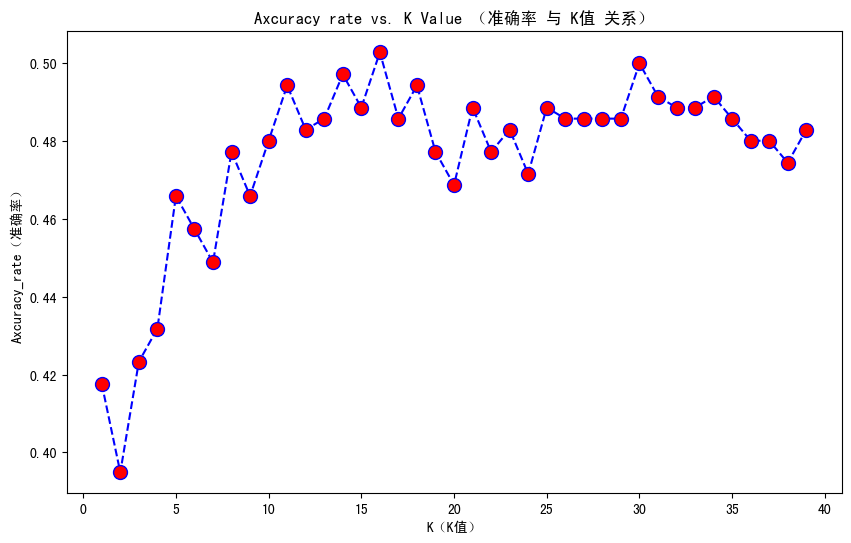

In [57]:
# 准确率可视化
plt.figure(figsize=(10,6))
plt.plot(range(1,40),Axcuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Axcuracy rate vs. K Value （准确率 与 K值 关系）')
plt.xlabel('K（K值）')
plt.ylabel('Axcuracy_rate（准确率）')
plt.show()

In [58]:
# 选择一个准确率最高的作为最终的K值，输入进入原始模型中
# Which K should be selected?
max_value = max(Axcuracy_rate)
print('Maximum ACC（最大精确度）:', max_value, "At K（当K值为）:", Axcuracy_rate.index(max_value)) # +1

Maximum ACC（最大精确度）: 0.5028409090909091 At K（当K值为）: 15


In [59]:
# 得出结论：KNN算法的顺确率更高，效果更好

## 8. Data Integration 数据整合

In [65]:
# 将Index与原数据库进行匹配
train_result_table = {
                      "原Index索引": list(i_train),
                      "机器最终预测值": list(pred_Train_knn_Model),
                      "人工标注实际值": list(y_train)}
train_result_table_df = pd.DataFrame(train_result_table)
train_result_table_df

,原Index索引,机器最终预测值,人工标注实际值
0,2022-09-20 20:26:19,6,6
1,2023-01-11 17:50:17,8,4
2,2022-11-05 22:15:51,6,6
3,2023-01-04 15:59:21,2,2
4,2022-09-20 01:12:19,2,2
...,...,...,...
1400,2022-09-01 10:09:59,5,8
1401,2022-09-06 16:40:11,2,2
1402,2022-11-23 14:33:42,2,2
1403,2022-09-24 21:09:34,8,8


In [66]:
test_result_table = {
                     "原Index索引": list(i_test),
                     "机器最终预测值": list(pred_Test_knn_Model),
                     "人工标注实际值": list(y_test)}
test_result_table_df = pd.DataFrame(test_result_table)
test_result_table_df

,原Index索引,机器最终预测值,人工标注实际值
0,2022-12-28 09:17:43,8,8
1,2022-07-30 14:37:46,8,1
2,2022-10-03 22:27:04,4,0
3,2022-11-29 07:48:28,6,6
4,2022-08-25 18:33:37,6,4
...,...,...,...
347,2022-10-15 20:52:33,6,6
348,2022-08-29 11:35:36,8,8
349,2022-11-02 10:32:03,8,8
350,2022-08-21 05:10:13,1,2


In [67]:
# The axis to concatenate along axis: {0/’index’, 1/’columns’}
result_table = pd.concat([train_result_table_df, test_result_table_df], axis=0)
result_table = result_table.sort_values("原Index索引", ascending=True)
# result_table = result_table.reset_index(drop=True)
result_table

,原Index索引,机器最终预测值,人工标注实际值
614,2022-07-29 00:33:51,3,4
99,2022-07-29 08:53:24,2,2
842,2022-07-29 09:20:44,6,6
537,2022-07-29 10:17:16,6,6
626,2022-07-29 14:17:41,2,6
...,...,...,...
1327,2023-01-26 18:53:44,6,4
268,2023-01-26 22:26:24,2,2
1063,2023-01-27 08:22:54,4,5
137,2023-01-27 16:50:23,9,7


In [68]:
# 整合结果

df_data = {
            "发表时间": list(df4["时间"]),
            "用户评级": list(df2["评级"]),
            "评论原话（标题 + 评论内容）": list(df4["评论"]),
            "提取结果（分词 + 去除停用词）": list(df4["分词结果"]),
            "机器学习": list(result_table["机器最终预测值"]),
            "人工标注": list(df2["分类"])}
df = pd.DataFrame(df_data)
df

,发表时间,用户评级,评论原话（标题 + 评论内容）,提取结果（分词 + 去除停用词）,机器学习,人工标注
0,2023-01-28 02:40:08,1,总是闪退没用一会就闪退 官方能解决下吗,"[闪退, 没用, 闪退]",3,2
1,2023-01-27 16:50:23,1,个性化推荐烂透了点过无数次不感兴趣，但还是会看到同样的低俗下流的相关产品。,"[个性化, 推荐, 烂透, 了点过, 看到, 低俗, 下流, 相关]",2,7
2,2023-01-27 08:22:54,1,官方首页推的助农活动骗人当时在一个助农活动买了水果 一直没到最后都自动到时间自动收货了 快递...,"[助农, 骗人, 水果, 时间, 快递, 根本, 根本, 途径]",6,5
3,2023-01-26 22:26:24,1,闪退烦死了苹果7疯狂闪退 非常影响使用体验！！！！,"[闪退, 烦死, 苹果, 疯狂, 闪退, 使用]",6,2
4,2023-01-26 18:53:44,1,平台不处理被骗消费者垃圾，上面有很多骗钱的，平台都不能投诉举报，注意着点吧。。。,"[处理, 投诉, 举报, 注意]",2,4
...,...,...,...,...,...,...
1752,2022-07-29 14:17:41,1,0什么软件无语死了，动不动就删除帖子，客服还跟不会说话一样，半天回一个消息,"[删除, 帖子, 说话, 消息]",6,6
1753,2022-07-29 10:17:16,1,垃圾软件商家不给退货，客服不解决问题，平台不维护买家权益，而是纵容卖家欺诈行为,"[退货, 维护, 权益, 纵容, 行为]",2,6
1754,2022-07-29 09:20:44,1,黑心lj平台付钱容易退钱难,"[付钱, 容易, 退钱]",4,6
1755,2022-07-29 08:53:24,1,最讨厌这种强制更新的垃圾我从淘宝卖旧物，转到闲鱼需要我重新登录，我输完验证码眼看就要登上了，...,"[讨厌, 强制, 旧物, 转到, 需要, 重新, 登录, 输完, 验证码, 眼看, 登上, ...",9,2


In [69]:
# 将向量化的结果进行输出,保存为csv格式，同时输出的结果不需要带上index索引，方便后续直接读取

# df.to_csv("/Users/steven/Downloads/result.csv", index=False)

## 9. Information Visualization 信息可视化

### 9.1用户评论分类情况

In [70]:
# 人工进行情感标注，为机器学习做准备
# 标注共分为3个大板块，9个小板块，对应序号1-9，对于无效评论，我们赋值0.

# 系统（程序功能，系统体验，账户安全）       1, 2, 3

# 购物（商品质量，物流问题，交易纠纷）       4, 5, 6

# 内容（社区生态，审核监督，宣传推广）       7, 8, 9

class_dictionary = {
                    0:"无效评论",
                    1:"程序功能",
                    2:"系统体验",
                    3:"账户安全",
                    4:"商品质量",
                    5:"物流问题",
                    6:"交易纠纷",
                    7:"社区生态",
                    8:"审核监督",
                    9:"宣传推广"}

mark_dictionary = {
                   1:"一星",
                   2:"二星",
                   3:"三星",
                   4:"四星",
                   5:"五星"}

In [71]:
# 整体打分平均分为：

df["用户评级"].mean()

1.3471826977803074

In [72]:
# 在200个数据集当中，分类的结果用柱状图显示出来（三个大类的颜色有区别）

# 查看分离后，作为Target的数据集，不同类别的数量统计
value_count1 = df["机器学习"].value_counts()
result_count_check1 = pd.DataFrame(value_count1)

class_list = []
comment_count_list = []
for index, row in result_count_check1.iterrows():
    class_list.append(index)
    count_value = row["机器学习"]
    comment_count_list.append(count_value)


value_counts_check_dic1 = {
                          "评论类别": class_list,
                          "机器分类结果统计": comment_count_list}
value_counts_check_df1 = pd.DataFrame(value_counts_check_dic1)
value_counts_check_df1 = value_counts_check_df1.sort_values("评论类别", ascending=True)
value_counts_check_df1 = value_counts_check_df1.reset_index(drop=True)
value_counts_check_df1

,评论类别,机器分类结果统计
0,0,54
1,1,392
2,2,173
3,3,29
4,4,237
5,5,15
6,6,368
7,7,63
8,8,374
9,9,52


In [73]:
class_list_verbal = []
for number in list(value_counts_check_df1["评论类别"]):
    class_detail = class_dictionary[number]
    class_list_verbal.append(class_detail)
print(class_list_verbal)
class_list_count = list(value_counts_check_df1["机器分类结果统计"])
print(class_list_count)

['无效评论', '程序功能', '系统体验', '账户安全', '商品质量', '物流问题', '交易纠纷', '社区生态', '审核监督', '宣传推广']
[54, 392, 173, 29, 237, 15, 368, 63, 374, 52]


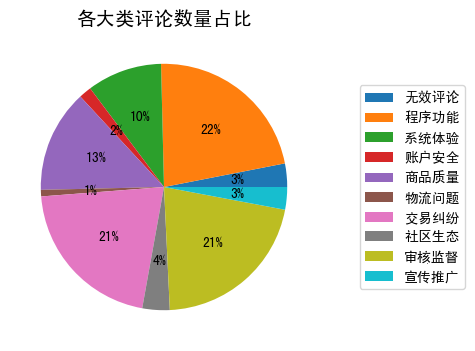

In [74]:
# 来一个饼图

# 设定画布的大小
fig = plt.figure(figsize=(6, 4))

ax = plt.gca()
ax.pie(class_list_count, startangle=0, autopct='%1.0f%%', radius=1)
plt.title("各大类评论数量占比", weight='bold',loc='center',size=14)
plt.legend(class_list_verbal, bbox_to_anchor=(1.5, 0.5), loc="right")
plt.show()

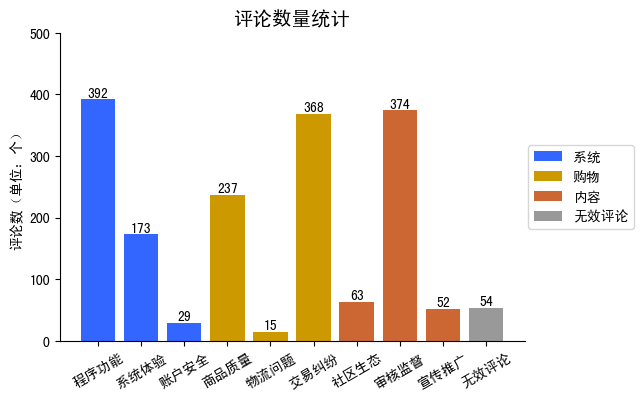

In [75]:
# 来一个柱状图

# 设定画布的大小
plt.figure(figsize=(6, 4))

# 去掉上面的边框和右边的边框
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 颜色："#3366FF" "#CC9900" "#CC6633"      "#999999"

class_list1 = []
class_list_count1 = []
class_list2 = []
class_list_count2 = []
class_list3 = []
class_list_count3 = []
class_list4 = []
class_list_count4 = []

# 在柱状图的上面添加注释
for a, b in zip(class_list_verbal, class_list_count):
    ax.text(a, b + 1, b, ha='center', va='bottom')

    # 分门别类进行画图
    if a in ['程序功能', '系统体验', '账户安全']:
        class_list1.append(a)
        class_list_count1.append(b)
    elif a in ['商品质量', '物流问题', '交易纠纷']:
        class_list2.append(a)
        class_list_count2.append(b)
    elif a in ['社区生态', '审核监督', '宣传推广']:
        class_list3.append(a)
        class_list_count3.append(b)
    else:
        class_list4.append(a)
        class_list_count4.append(b)
        
ax.bar(class_list1, class_list_count1, color="#3366FF", label="系统")
ax.bar(class_list2, class_list_count2, color="#CC9900", label="购物")
ax.bar(class_list3, class_list_count3, color="#CC6633", label="内容")
ax.bar(class_list4, class_list_count4, color="#999999", label="无效评论")

plt.ylim(0, 500)
plt.xticks(rotation=30)
plt.ylabel("评论数（单位：个）")
plt.title("评论数量统计", weight='bold',loc='center',size=14)
plt.legend(bbox_to_anchor=(1.25, 0.5), loc="right")
plt.show()

# 9.2 用户评分整体情况

In [154]:
# 星级评分汇总
value_count2 = df["用户评级"].value_counts()
result_count_check2 = pd.DataFrame(value_count2)
result_count_check2

class_list = []
mark_count_list = []

for index, row in result_count_check2.iterrows():
    class_list.append(index)
    count_value = row["用户评级"]
    mark_count_list.append(count_value)


value_counts_check_dic2 = {
                          "评分等级": class_list,
                          "评分为该等级的用户数量": mark_count_list}
value_counts_check_df2 = pd.DataFrame(value_counts_check_dic2)
value_counts_check_df2 = value_counts_check_df2.sort_values("评分等级", ascending=True)
value_counts_check_df2 = value_counts_check_df2.reset_index(drop=True)
value_counts_check_df2

,评分等级,评分为该等级的用户数量
0,1,632
1,2,26
2,3,33
3,4,21
4,5,26


In [155]:
mark_list_verbal = []
for mark_number in list(value_counts_check_df2["评分等级"]):
    class_detail = mark_dictionary[mark_number]
    mark_list_verbal.append(class_detail)
print(mark_list_verbal)
mark_list_count = list(value_counts_check_df2["评分为该等级的用户数量"])
print(mark_list_count)

['一星', '二星', '三星', '四星', '五星']
[632, 26, 33, 21, 26]


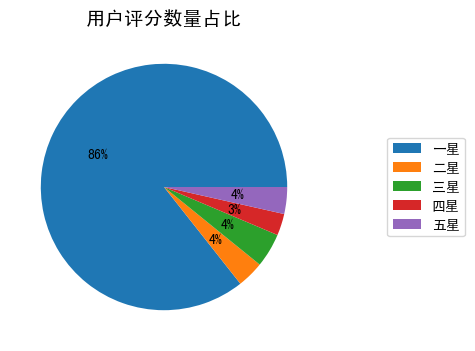

In [156]:
# 来一个饼图

# 设定画布的大小
fig = plt.figure(figsize=(6, 4))

ax = plt.gca()
ax.pie(mark_list_count, startangle=0, autopct='%1.0f%%', radius=1)
plt.title("用户评分数量占比", weight='bold',loc='center',size=14)
plt.legend(mark_list_verbal, bbox_to_anchor=(1.5, 0.5), loc="right")
plt.show()

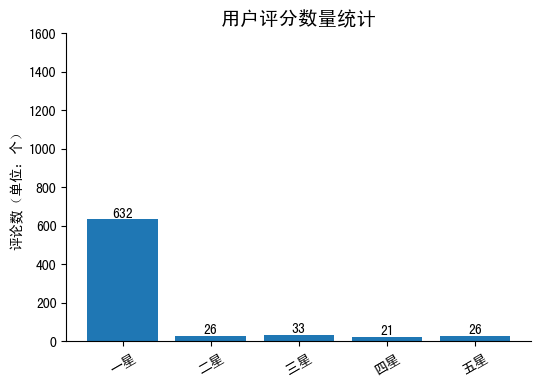

In [157]:
# 来一个柱状图

# 设定画布的大小
plt.figure(figsize=(6, 4))

# 去掉上面的边框和右边的边框
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# 在柱状图的上面添加注释
for a, b in zip(mark_list_verbal, mark_list_count):
    ax.text(a, b + 1, b, ha='center', va='bottom')

# 画图
ax.bar(mark_list_verbal, mark_list_count)

plt.ylim(0, 1600)
plt.xticks(rotation=30) # 下标倾斜30度
plt.ylabel("评论数（单位：个）")
plt.title("用户评分数量统计", weight='bold',loc='center',size=14)
plt.show()

### 9.2 程序功能 分析

In [158]:
# 针对类型一（程序功能）进行分析 后面的结果以此类推
# 首先分析其垃圾的地方

# 系统（程序功能，系统体验，账户安全）       1, 2, 3

# 购物（商品质量，物流问题，交易纠纷）       4, 5, 6

# 内容（社区生态，审核监督，宣传推广）       7, 8, 9

df8 = df.loc[df["机器学习"] == 8]
df8

,发表时间,用户评级,评论原话（标题 + 评论内容）,提取结果（分词 + 去除停用词）,机器学习,人工标注
4,1/26/23 18:53,1,平台不处理被骗消费者垃圾，上面有很多骗钱的，平台都不能投诉举报，注意着点吧。。。,"[处理, 投诉, 举报, 注意]",8,4
7,1/26/23 6:15,5,看倮㚢🅰️Ⓜ️🆎点㏄居然还扣燃料有些车真的只差点点就可以拿到太影响心情不要太认真作为单机休闲...,"[燃料, 差点, 拿到, 心情, 认真, 单机, 玩玩, 缩圈, 太慢, 了缩, 太慢, 了...",8,0
11,1/25/23 14:47,5,闲鱼上的卖家又不是客服个人觉得咸鱼挺好用的，买一些二手闲置或者其他的什么也挺方便。卖一些不用...,"[觉得, 挺好用, 方便, 不用, 买错, 方便, 买到, 应该, 专柜, 态度, 私人, ...",8,4
14,1/25/23 7:09,5,能不能修改会员名阿淘宝都让修改会员名了 咸鱼为啥不同步阿 害得我注销了 然后以为重新注...,"[修改, 修改, 害得, 注销, 重新, 注册, 机会, 默认, 搞笑]",8,1
15,1/25/23 5:58,1,真正闲置二手物品越来越少现在闲鱼真的太恶心了 逛半天，好多东西一点进去，都是什么戳主页了解详...,"[二手物品, 进去, 主页, 了解, 详情, 私聊, 了解, 详情, 全是, 店铺, 广告,...",8,9
...,...,...,...,...,...,...
715,11/2/22 19:35,1,恶心至极随意乱封号 我就发布自己的游戏账号 封七天又封七天 你家是有大病是吧？？？？,"[至极, 封号, 发布, 游戏, 大病]",8,7
716,11/2/22 18:42,1,！明明就和淘宝一个账户，系统一直说不是！都发布不了！乱七八糟的！客服也是没什么作用！解决不了问题,"[账户, 发布, 不了, 作用, 解决不了]",8,6
723,11/2/22 10:32,1,霸王条款，垃圾客服，谁用谁生气系统误判商品违规，申诉后人工审核随意判定申诉不成功，打电话投诉...,"[霸王, 生气, 误判, 申诉, 人工, 审核, 判定, 申诉, 成功, 投诉, 说明, 误...",8,8
735,10/31/22 21:39,1,平台不处理任何问题！！！非说我是代购！（该条评论已经被删除）如题，烦死了,"[处理, 代购, 评论, 删除, 烦死]",8,8


In [159]:
# 将去除停用词后的文本分词进行格式转化，方便加下来的文本向量化操作
text_string1 = ""
for token_list in list(df8["提取结果（分词 + 去除停用词）"]):
    final_element = token_list[-1]
    for token in token_list:
        if token == final_element:
            text_string1 = text_string1 + token
        else:
            text_string1 = text_string1 + token + " "

text_string1

'处理 投诉 举报 注意燃料 差点 拿到 心情 认真 单机 玩玩 缩圈 太慢 了缩 太慢 了缩 太慢 挺好 整体 不错 期待 内容 画面 要求 重点 玩法 挺好玩 属于 节奏 需要 值得 拥有 喜欢 不同 技能 搭配 占优 取胜 喜欢 丫头 喜爱 酒肆 喜欢 种田 不想 打城 心态 好玩 地形 认识 朋友 挺好玩 不错 很高 观赏性 可玩性 萌新 看看 知道 咋玩 很棒 有点 值得 加油 单论 玩法 觉得 好玩 可玩性 符合 样子 觉得 还原 剧情 人物 不错 不错 值得 不错 五星 运气 挺好玩 资源 搞起 下决心 改改 挺好 不错 爱斗音觉得 挺好用 方便 不用 买错 方便 买到 应该 专柜 态度 私人 专门 开店 大爷修改 修改 害得 注销 重新 注册 机会 默认 搞笑二手物品 进去 主页 了解 详情 私聊 了解 详情 全是 店铺 广告 标的 低价 吸引 进去 推出 宗旨 直接 下架 乱象 局面 品牌地方 上架 假冒 扣分 封号 知道 封号 希望 下载 考虑 清楚 解决不了 需要 小票 了上圈钱 圈钱 不用发布 刷新 不用需要 平板 推出 模式 都行代购 售卖 判定 无故 下架贩子 保障 退货 签收 收到 卸载收到 确认 延迟 转转 不用 了差 注意 避坑聊天 聊天记录 看不到 消息感人 私信 谐音 骂人 举报 判定 点心遇到 遇到 上报 态度 告知 损失 没法 追回 直接 有点 虚拟 直观 服务费 考虑 利益下架 封号 不让 注销 登陆 记录 存在 盗取 审核 脑子 评论 不想恢复 砍价 二手交易 取消 脑子使用 购买 手机 远离 根本 保障 气死 机卖 看不出希望 开通 深色 模式 模式 希望 开通 跟随 手机 深色 模式 转卖 转卖 显示 实际 购买 时间 具体 使用 时长 方便 参考电子 恶意 退票小铺 规格 需要 改进 小铺 规格 不了 规格 规格 单价 库存 根本 单价 反馈 根本 没用 链接 规格 知道 算不算评论 不想 相信 便宜骗人 买卖 希望 上当 受骗人 警告改进学下 切换 简单 快捷 聊天 界面 看不到 改进希望 深色 模式 整体 不错 缺点 深色 模式 希望 版本 适配 深色 模式 使用 亮眼 希望 能够评论 能放 打烂谨防 主页 显示 退款 次数 交易过程 提示 受骗 推脱 责任 保护建议 发布 可能 想要 消息 消息 容易 希望 

In [160]:
string_cut = pseg.lcut(text_string1)
print(string_cut)

[pair('处理', 'v'), pair(' ', 'x'), pair('投诉', 'v'), pair(' ', 'x'), pair('举报', 'v'), pair(' ', 'x'), pair('注意', 'v'), pair('燃料', 'n'), pair(' ', 'x'), pair('差点', 'n'), pair(' ', 'x'), pair('拿到', 'v'), pair(' ', 'x'), pair('心情', 'n'), pair(' ', 'x'), pair('认真', 'ad'), pair(' ', 'x'), pair('单机', 'n'), pair(' ', 'x'), pair('玩玩', 'n'), pair(' ', 'x'), pair('缩圈', 'n'), pair(' ', 'x'), pair('太慢', 'a'), pair(' ', 'x'), pair('了缩', 'v'), pair(' ', 'x'), pair('太慢', 'a'), pair(' ', 'x'), pair('了缩', 'v'), pair(' ', 'x'), pair('太慢', 'a'), pair(' ', 'x'), pair('挺', 'd'), pair('好', 'a'), pair(' ', 'x'), pair('整体', 'n'), pair(' ', 'x'), pair('不错', 'a'), pair(' ', 'x'), pair('期待', 'v'), pair(' ', 'x'), pair('内容', 'n'), pair(' ', 'x'), pair('画面', 'n'), pair(' ', 'x'), pair('要求', 'v'), pair(' ', 'x'), pair('重点', 'n'), pair(' ', 'x'), pair('玩法', 'n'), pair(' ', 'x'), pair('挺好玩', 'a'), pair(' ', 'x'), pair('属于', 'v'), pair(' ', 'x'), pair('节奏', 'n'), pair(' ', 'x'), pair('需要', 'v'), pair(' ', 'x'), pair('值得

In [161]:
string_cut_list = []
for word, flag in string_cut:
    if len(word) >=2:                            # 分词过后的关键词至少为2个词
        if flag in ["n", "nz"]:       # n: 名字 v:动词 a:形容词 ad: 副词
            string_cut_list.append(word)

string_cut_list

['燃料',
 '差点',
 '心情',
 '单机',
 '玩玩',
 '缩圈',
 '整体',
 '内容',
 '画面',
 '重点',
 '玩法',
 '节奏',
 '技能',
 '丫头',
 '酒肆',
 '种田',
 '心态',
 '地形',
 '朋友',
 '观赏性',
 '有点',
 '单论',
 '玩法',
 '样子',
 '剧情',
 '人物',
 '五星',
 '运气',
 '资源',
 '爱斗音',
 '专柜',
 '态度',
 '私人',
 '专门',
 '开店',
 '大爷',
 '机会',
 '二手物品',
 '主页',
 '店铺',
 '广告',
 '标的',
 '低价',
 '宗旨',
 '乱象',
 '局面',
 '品牌',
 '地方',
 '封号',
 '封号',
 '小票',
 '圈钱',
 '圈钱',
 '平板',
 '模式',
 '都行',
 '无故',
 '贩子',
 '聊天',
 '聊天记录',
 '消息',
 '感人',
 '私信',
 '谐音',
 '骂人',
 '态度',
 '损失',
 '有点',
 '直观',
 '服务费',
 '利益',
 '封号',
 '记录',
 '脑子',
 '评论',
 '二手交易',
 '脑子',
 '手机',
 '气死',
 '机卖',
 '深色',
 '模式',
 '模式',
 '手机',
 '深色',
 '模式',
 '实际',
 '时间',
 '电子',
 '规格',
 '规格',
 '规格',
 '规格',
 '单价',
 '库存',
 '单价',
 '链接',
 '规格',
 '评论',
 '骗人',
 '受骗人',
 '警告',
 '学下',
 '聊天',
 '界面',
 '深色',
 '模式',
 '整体',
 '缺点',
 '深色',
 '模式',
 '版本',
 '深色',
 '模式',
 '亮眼',
 '评论',
 '主页',
 '次数',
 '交易过程',
 '责任',
 '建议',
 '消息',
 '消息',
 '开发者',
 '帖子',
 '数量',
 '帖子',
 '数量',
 '评论',
 '动态',
 '动态',
 '讲价',
 '动态',
 '极差',
 '对面',
 '定金',
 '广告',
 '利润',
 '财产',
 '全程',
 '去死吧',

In [162]:
text_string2 = ""
for token in string_cut_list:
    if token == string_cut_list[-1]:
        text_string2 = text_string2 + token
    else:
        text_string2 = text_string2 + token + " "

text_string2

'燃料 差点 心情 单机 玩玩 缩圈 整体 内容 画面 重点 玩法 节奏 技能 丫头 酒肆 种田 心态 地形 朋友 观赏性 有点 单论 玩法 样子 剧情 人物 五星 运气 资源 爱斗音 专柜 态度 私人 专门 开店 大爷 机会 二手物品 主页 店铺 广告 标的 低价 宗旨 乱象 局面 品牌 地方 封号封号小票 圈钱 圈钱 平板 模式 都行 无故 贩子 聊天 聊天记录 消息 感人 私信 谐音 骂人 态度 损失 有点 直观 服务费 利益 封号记录 脑子 评论 二手交易 脑子 手机 气死 机卖 深色 模式 模式 手机 深色 模式 实际 时间 电子 规格 规格 规格 规格 单价 库存 单价 链接 规格 评论 骗人 受骗人 警告 学下 聊天 界面 深色 模式 整体 缺点 深色 模式 版本 深色 模式 亮眼 评论 主页 次数 交易过程 责任 建议 消息 消息 开发者 帖子 数量 帖子 数量 评论 动态 动态 讲价 动态 极差 对面 定金 广告 利润 财产 全程 去死吧 权益 违禁品 典型 害人 电信 集团 工司 帐号 地方 名称 动态 动态 过分 动态 模式 百度 模式 视频 视频 白色 动态 差差 差差 动态 国家 霸王 互联网 公司 消息 客户 消息 消息 等候 别坑 货被 菜鸟 驿站 水货 国家 监督管理 部门 公平 公平 错误 水军 老板 动态 评论 意义 动态 记录 动态 用处 羊毛 损失 羊毛 规矩 不合理 封号优质 菩萨 看运气 神经病 心情 建议 小号 神经病 棉花 维权 维权 人性 电脑 错误 个例 原则 无人 公平 法院 诚信 售后 小学 动脑子 公平 聚集地 漏洞 规则 保护伞 无权 资金 交易过程 意见 报警 需谨慎 页面 页面 模式 键盘输入 基本 报警 实名制 正事 部门 部门 游戏 游戏 公告 订单 价格低 财产 失望透顶 标价 实价 白猫 白猫 土猫 白猫 白猫 封号封号专辑 封号热门 流量 真牛 游戏 聊天 帐号 订单 号码 聊天记录 工作人员 工作日 脑子 要点 详情页 经理 离谱 离谱 全家 作者 家人 货车 无故 骂人 封号封号事情 永远都是 对面 建议 助长 经历 损失 小猫 真实性 至极 文案 评论 少花 冤枉钱 助长 病毒 机制 贩子 传家宝 小米 滑板车 废品 小蜜 证据 证据 核实 换货 能力 权益 流量 同感 闲友 地方 商业

In [163]:
# jieba分词 基于 TF-IDF 算法的关键词抽取
import jieba.analyse

# allowPOS=["n", "nz"]

tag1 = jieba.analyse.extract_tags(text_string2, topK=20, withWeight=True)
tag1_df = pd.DataFrame(data=tag1, columns=["关键词", "关键词权重值"])
tag1_df

,关键词,关键词权重值
0,封号,0.339368
1,评论,0.189489
2,动态,0.121398
3,模式,0.119023
4,消息,0.116050
5,聊天记录,0.108121
6,帖子,0.095374
7,房东,0.091157
8,极差,0.082652
9,手机,0.081208


In [164]:
# jieba分词 基于 TextRank 算法的关键词抽取

tag2 = jieba.analyse.textrank(text_string2, topK=10, withWeight=True)
tag2_df = pd.DataFrame(data=tag2, columns=["关键词", "关键词权重值"])
tag2_df

# 根据结果分析Stopwords
# stopwords = ["模式", "感觉", "卖家", "买家", "闲置", "商品", "问题", "恶心", "评价", "官方", "办法"]

,关键词,关键词权重值
0,封号,1.000000
1,评论,0.773614
2,消息,0.602222
3,模式,0.516523
4,动态,0.474272
5,手机,0.348839
6,帖子,0.305305
7,房东,0.280088
8,人工,0.265612
9,极差,0.262971


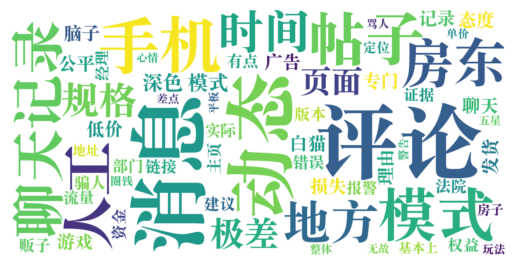

In [165]:
# 词云可视化（情感词语） 未设置任何词汇屏蔽
from wordcloud import WordCloud

# 生成一个词云实例 Generate a word cloud image
wc = WordCloud(background_color="white", font_path="/Library/Fonts/Songti.ttc",
               width=1200, height=600, max_words=60)
wc = wc.generate(text_string2)

# 使用Matplotlib将生成的云图进行展示 Display the generated image in the matplotlib way:     SimHei
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

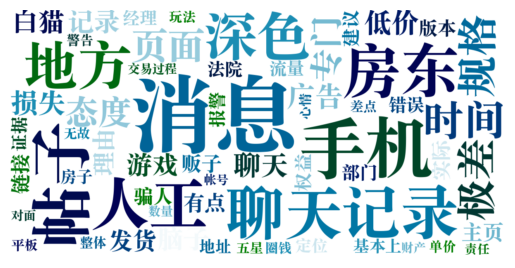

In [166]:
# 词云可视化（情感词语） 去除一些词汇 同时增加一些颜色上的变化
from wordcloud import WordCloud

stopwords = ["卖家", "买家", "闲置", "商品", "问题", "恶心", "评价", 
             "官方", "办法", "骗子", "功能", "无法","电商", 
             "用户", "平台", "人员", "质量", "客服", "假货", 
             "商家", "动态", "体验", "资金", "情况", "评论", "偏向",
             "公平", "模式", "字体", "骂人", "联系", "样子", "问问",
             "照片", "现实", "贵重", "系统", "信用", "条款", "信息"]

# 生成一个词云实例 Generate a word cloud image
wc = WordCloud(background_color="white", font_path="/Library/Fonts/Songti.ttc",
               width=1200, height=600, max_words=60, colormap="ocean", stopwords=stopwords)  # stopwords=stopwords
wc = wc.generate(text_string2)

# 使用Matplotlib将生成的云图进行展示 Display the generated image in the matplotlib way:     SimHei
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## 10.  Refinement Scheme 精进方案

* 提升样本数据容量，数据越多，训练越精细（扩大样本规模，从2000个扩展至更多）


* 选择合适算法，选择合适的参数，参数的确定对于结果影响很大（KNN，K的取值很关键）


* 停用词词库的优化，针对平台选择需要挑选特定停用词（对于闲鱼平台，需要有特定的停用词）


* 分词算法改进与提升，需要根据目前网络用语使用环境，使用机器学习进行新单词认知和学习（jieba传统的分词效果不太好，需要使用paddlepaddle）


* 关键词去重（提取出来的关键词需要进行去重，会影响到后面的判断）